<a href="https://colab.research.google.com/github/fwangjuwon/bigdata_real_estate_price/blob/main/real_estate_price_data_%ED%99%A9%EC%A3%BC%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **서울시 용산구 아파트 실거래가 분석**
### 부제: 어떤 아파트를 사야할까? 내 생에 자가는 존재할까


> https://data.seoul.go.kr/dataList/OA-21275/S/1/datasetView.do

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.4 MB/s eta 0:00:00


In [3]:
df = pd.read_csv('real_apt_price_yongsan_a.csv', encoding='cp949')
df.head()

<ipython-input-3-a08837d0b6f6>:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('real_apt_price_yongsan_a.csv', encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11170,용산구,12500,한강로2가,1.0,대지,2.0,11.0,한강로 대우아이빌,...,32000,39.76,53.09,10.0,NaN,NaN,2004,오피스텔,중개거래,서울 용산구
1,2024,11170,용산구,12500,한강로2가,1.0,대지,2.0,11.0,한강로 대우아이빌,...,25500,34.83,46.19,7.0,NaN,NaN,2004,오피스텔,중개거래,서울 용산구
2,2024,11170,용산구,13100,한남동,1.0,대지,27.0,2.0,형우베스트빌3차,...,330000,237.05,NaN,5.0,NaN,NaN,2000,아파트,직거래,NaN
3,2024,11170,용산구,11500,산천동,1.0,대지,193.0,0.0,리버힐삼성,...,142000,114.48,0.00,6.0,NaN,NaN,2001,아파트,중개거래,서울 용산구
4,2024,11170,용산구,12500,한강로2가,1.0,대지,2.0,8.0,한강로벽산메가트리움,...,33700,32.15,47.89,17.0,NaN,NaN,2005,오피스텔,중개거래,서울 용산구


In [4]:
df

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11170,용산구,12500,한강로2가,1.0,대지,2.0,11.0,한강로 대우아이빌,...,32000,39.76,53.09,10.0,NaN,NaN,2004,오피스텔,중개거래,서울 용산구
1,2024,11170,용산구,12500,한강로2가,1.0,대지,2.0,11.0,한강로 대우아이빌,...,25500,34.83,46.19,7.0,NaN,NaN,2004,오피스텔,중개거래,서울 용산구
2,2024,11170,용산구,13100,한남동,1.0,대지,27.0,2.0,형우베스트빌3차,...,330000,237.05,NaN,5.0,NaN,NaN,2000,아파트,직거래,NaN
3,2024,11170,용산구,11500,산천동,1.0,대지,193.0,0.0,리버힐삼성,...,142000,114.48,0.00,6.0,NaN,NaN,2001,아파트,중개거래,서울 용산구
4,2024,11170,용산구,12500,한강로2가,1.0,대지,2.0,8.0,한강로벽산메가트리움,...,33700,32.15,47.89,17.0,NaN,NaN,2005,오피스텔,중개거래,서울 용산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61584,2006,11170,용산구,11800,원효로4가,1.0,대지,118.0,16.0,산호,...,43500,78.06,NaN,8.0,NaN,NaN,1977,아파트,NaN,NaN
61585,2006,11170,용산구,11500,산천동,1.0,대지,193.0,0.0,리버힐삼성,...,52500,114.48,NaN,15.0,NaN,NaN,2001,아파트,NaN,NaN
61586,2006,11170,용산구,12900,이촌동,1.0,대지,402.0,0.0,강촌,...,95000,114.60,NaN,19.0,NaN,NaN,1998,아파트,NaN,NaN
61587,2006,11170,용산구,11700,원효로3가,1.0,대지,124.0,1.0,금성,...,9600,30.84,NaN,4.0,NaN,NaN,1971,아파트,NaN,NaN


## 해제사유 발생일 (취소일)
해제사유 발생일 : 계약이 해지된 건에 대한 해지일

In [5]:
# 취소일이 존재하는 데이터 삭제,
df = df.drop(index=df[df['취소일'].notnull()].index)

In [6]:
df[df['취소일'].notnull()]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명


## 사용할 컬럼만 추출

시군구, 전용면적(㎡), 거래금액(만원)

In [7]:
df = df[['자치구명','법정동명','건물명','건물면적(㎡)' ,'물건금액(만원)','건물용도','접수연도', '건축년도']]
df.head()

,자치구명,법정동명,건물명,건물면적(㎡),물건금액(만원),건물용도,접수연도,건축년도
0,용산구,한강로2가,한강로 대우아이빌,39.76,32000,오피스텔,2024,2004
1,용산구,한강로2가,한강로 대우아이빌,34.83,25500,오피스텔,2024,2004
2,용산구,한남동,형우베스트빌3차,237.05,330000,아파트,2024,2000
3,용산구,산천동,리버힐삼성,114.48,142000,아파트,2024,2001
4,용산구,한강로2가,한강로벽산메가트리움,32.15,33700,오피스텔,2024,2005


In [8]:
df.dtypes

자치구명         object
법정동명         object
건물명          object
건물면적(㎡)     float64
물건금액(만원)      int64
건물용도         object
접수연도          int64
건축년도          int64
dtype: object

In [9]:
# 전용면적 : int(소수점 무시)
df['건물면적(㎡)'] = df['건물면적(㎡)'].astype('int64')
df['건축년도'] = df['건축년도'].astype('int64')

In [10]:
df.dtypes

자치구명        object
법정동명        object
건물명         object
건물면적(㎡)      int64
물건금액(만원)     int64
건물용도        object
접수연도         int64
건축년도         int64
dtype: object

In [11]:
df.head()

,자치구명,법정동명,건물명,건물면적(㎡),물건금액(만원),건물용도,접수연도,건축년도
0,용산구,한강로2가,한강로 대우아이빌,39,32000,오피스텔,2024,2004
1,용산구,한강로2가,한강로 대우아이빌,34,25500,오피스텔,2024,2004
2,용산구,한남동,형우베스트빌3차,237,330000,아파트,2024,2000
3,용산구,산천동,리버힐삼성,114,142000,아파트,2024,2001
4,용산구,한강로2가,한강로벽산메가트리움,32,33700,오피스텔,2024,2005


 분석할 건물용도 선택 -> 아파트

 건물면적 -> 가장 선호하는 59~114 m2으로  분석


In [12]:
df['건물용도'].value_counts()

건물용도
아파트      24838
연립다세대    19551
단독다가구     9156
오피스텔      7305
Name: count, dtype: int64

In [13]:
df['건물면적(㎡)'].value_counts()

건물면적(㎡)
84     6017
59     5553
114    1494
29     1451
25     1004
       ... 
552       1
462       1
784       1
563       1
484       1
Name: count, Length: 596, dtype: int64

In [14]:
# prompt: 건물용도가 '아파트' 인 것과 건물면적(㎡) 이 59 이상 114 이하인것들에 대해서만 분석할 코드를 짜줘

df_apt = df[df['건물용도'] == '아파트']
df_apt = df_apt[df_apt['건물면적(㎡)'] >= 59]
df_apt = df_apt[df_apt['건물면적(㎡)'] <= 114]

# Do analysis on df_apt here
df_apt

,자치구명,법정동명,건물명,건물면적(㎡),물건금액(만원),건물용도,접수연도,건축년도
3,용산구,산천동,리버힐삼성,114,142000,아파트,2024,2001
7,용산구,이촌동,동아그린,84,137000,아파트,2024,1999
10,용산구,한남동,한남파라곤,82,164000,아파트,2024,2011
12,용산구,이촌동,이촌코오롱(A),59,149500,아파트,2024,1999
14,용산구,이촌동,동부센트레빌,100,228000,아파트,2024,2001
...,...,...,...,...,...,...,...,...
61579,용산구,이촌동,한강(대우),60,52500,아파트,2006,2000
61581,용산구,도원동,삼성래미안,84,45250,아파트,2006,2001
61584,용산구,원효로4가,산호,78,43500,아파트,2006,1977
61585,용산구,산천동,리버힐삼성,114,52500,아파트,2006,2001


2019년 이후로 부동산 가격 폭등 2019년 이후로만 분석해보자

In [15]:
# prompt: '접수연도'가 2019 이상인 것들에 대해서만 분석할 코드를 짜줘

df_apt = df_apt[df_apt['접수연도'] >= 2019]
df_apt

,자치구명,법정동명,건물명,건물면적(㎡),물건금액(만원),건물용도,접수연도,건축년도
3,용산구,산천동,리버힐삼성,114,142000,아파트,2024,2001
7,용산구,이촌동,동아그린,84,137000,아파트,2024,1999
10,용산구,한남동,한남파라곤,82,164000,아파트,2024,2011
12,용산구,이촌동,이촌코오롱(A),59,149500,아파트,2024,1999
14,용산구,이촌동,동부센트레빌,100,228000,아파트,2024,2001
...,...,...,...,...,...,...,...,...
14878,용산구,후암동,혜당,83,64000,아파트,2019,2011
14909,용산구,한남동,한성1,60,48500,아파트,2019,1974
16437,용산구,효창동,용산 롯데캐슬 센터포레,59,103000,아파트,2019,0
16492,용산구,효창동,용산 롯데캐슬 센터포레,84,124700,아파트,2019,0


# 법정동명 평균, 최대, 최소, 중간값 추출

In [54]:
#평균값
df_apt_mean = df_apt.groupby('법정동명')['물건금액(만원)'].mean()
#최대값
df_apt_max = df_apt.groupby('법정동명')['물건금액(만원)'].max()
#최소값
df_apt_min = df_apt.groupby('법정동명')['물건금액(만원)'].min()
#중간값
df_apt_median = df_apt.groupby('법정동명')['물건금액(만원)'].median()


In [55]:
df_apt_price = pd.concat([df_apt_mean, df_apt_max,df_apt_min,df_apt_median],axis=1)
df_apt_price.columns = ['평균','최대','최소','중간']
df_apt_price

,평균,최대,최소,중간
법정동명,,,,
갈월동,89640.000000,109000,71000,90000.0
도원동,110357.142857,174000,70000,106650.0
동자동,66000.000000,66000,66000,66000.0
문배동,115391.709845,167000,75000,115500.0
보광동,160526.027397,240000,96000,155000.0
산천동,97986.822430,182000,59500,93400.0
서빙고동,157238.709677,258000,88000,159500.0
신계동,159231.506849,210000,107000,160000.0
신창동,91165.789474,114000,71250,90000.0


중간값으로 내림차순해서 분석해보자

In [23]:
df_apt_price = df_apt_price.sort_values('중간', ascending=False)
df_apt_price

,평균,최대,최소,중간
법정동명,,,,
한강로3가,206642.952381,370000,43500,197550.0
용산동5가,204210.526316,260000,175000,195000.0
신계동,159231.506849,210000,107000,160000.0
서빙고동,157238.709677,258000,88000,159500.0
이촌동,159753.245478,400000,61000,155000.0
보광동,160526.027397,240000,96000,155000.0
이태원동,144745.555556,219000,47000,143000.0
원효로1가,143044.444444,182500,109500,140000.0
한강로1가,126857.575758,173000,63000,137000.0


In [29]:
#반올림시켜줬다.
df_apt_price['중간'] = round(df_apt_price['중간'],1)
df_apt_price

,평균,최대,최소,중간
법정동명,,,,
한강로3가,206642.952381,370000,43500,197550.0
용산동5가,204210.526316,260000,175000,195000.0
신계동,159231.506849,210000,107000,160000.0
서빙고동,157238.709677,258000,88000,159500.0
이촌동,159753.245478,400000,61000,155000.0
보광동,160526.027397,240000,96000,155000.0
이태원동,144745.555556,219000,47000,143000.0
원효로1가,143044.444444,182500,109500,140000.0
한강로1가,126857.575758,173000,63000,137000.0


## 아파트 매매가 현황 시각화

In [26]:
import numpy as np
x_index = np.arange(1,len(df_apt_price)+1)
x_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

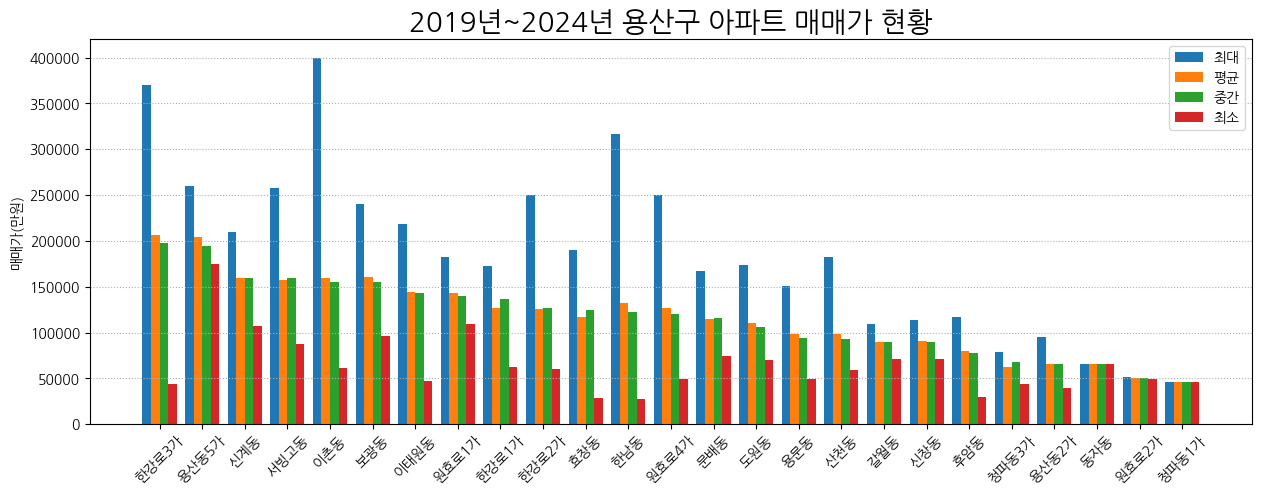

In [30]:
plt.rcParams['figure.figsize']=(15,5)
plt.bar(x_index-0.3, df_apt_price['최대'], width=0.2, label='최대')
plt.bar(x_index-0.1, df_apt_price['평균'], width=0.2, label='평균')
plt.bar(x_index+0.1, df_apt_price['중간'], width=0.2, label='중간')
plt.bar(x_index+0.3, df_apt_price['최소'], width=0.2, label='최소')
plt.legend()
plt.xticks(x_index, labels=df_apt_price.index, rotation=45)
plt.grid(axis='y', ls=':')
plt.title('2019년~2024년 용산구 아파트 매매가 현황', size=20)
plt.ylabel('매매가(만원)')
plt.show();

변화정도를 알기 위해 2023년도의 중간값을 뽑아서 정렬시켜보자

In [31]:
# prompt: '접수연도'가 2023 인 것 중에서 '매매가(만원)'의 중간값이 큰 것 10개만 가져오는 코드를 짜줘. 대신 '법정동명'은 중복되지 않게 해줘

df_apt_2023 = df_apt[df_apt['접수연도'] == 2023]
df_apt_2023_median = df_apt_2023.groupby('법정동명')['물건금액(만원)'].median().sort_values(ascending=False)
df_apt_2023_median_unique = df_apt_2023_median.drop_duplicates()
df_apt_2023_median_unique.head(10)


법정동명
한강로3가    293000.0
용산동5가    251500.0
보광동      195000.0
서빙고동     184500.0
이태원동     183000.0
이촌동      179000.0
신계동      177500.0
한남동      171500.0
원효로1가    158000.0
한강로1가    153500.0
Name: 물건금액(만원), dtype: float64

2023년도 실거래가 중간값이 가장 큰 10개의 동네에 대해서 19년도에서 24년도까지의 실거래가가격의 변화정도를 그래프로 만들어보자

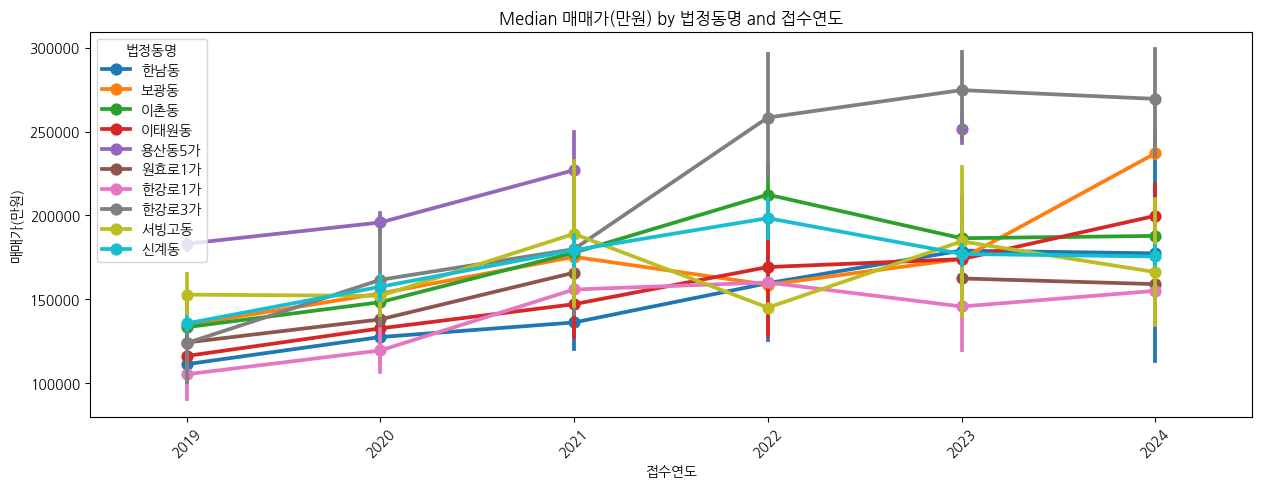

In [36]:
# prompt: 위에서 뽑은 10개의  '법정동명', '접수연도'별 로  '매매가(만원)'의 중간값의 변화를 pointplot으로 시각화할 수 있는 코드를 짜줘

import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of the top 10 법정동명
top_10_법정동명 = df_apt_2023_median_unique.index[:10].to_list()

# Filter the dataframe to only include the top 10 법정동명
df_apt_top_10 = df_apt[df_apt['법정동명'].isin(top_10_법정동명)]

# Create a pointplot of the median 매매가(만원) for each 법정동명 and 접수연도
sns.pointplot(data=df_apt_top_10, x="접수연도", y="물건금액(만원)", hue="법정동명")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels to the plot
plt.title("Median 매매가(만원) by 법정동명 and 접수연도")
plt.xlabel("접수연도")
plt.ylabel("매매가(만원)")

# Show the plot
plt.show()


한강로 3가의 중간값 가격이 가장 가파르게 변화되었다.
- 한강로 3가의 데이터 분석 다시 해보자
- 2번째: 이촌동

In [37]:
df_apt[df_apt['법정동명'] == '한강로3가']

,자치구명,법정동명,건물명,건물면적(㎡),물건금액(만원),건물용도,접수연도,건축년도
346,용산구,한강로3가,센트럴파크,102,272000,아파트,2024,2020
366,용산구,한강로3가,센트럴파크,92,247500,아파트,2024,2020
413,용산구,한강로3가,센트럴파크,114,305000,아파트,2024,2020
420,용산구,한강로3가,센트럴파크,114,318000,아파트,2024,2020
479,용산구,한강로3가,센트럴파크,114,290000,아파트,2024,2020
...,...,...,...,...,...,...,...,...
12940,용산구,한강로3가,쌍용스윗닷홈,84,119000,아파트,2019,2003
13042,용산구,한강로3가,우림필유,84,117000,아파트,2019,2006
13603,용산구,한강로3가,쌍용스윗닷홈,84,98000,아파트,2019,2003
13836,용산구,한강로3가,한강자이에클라트,80,85000,아파트,2019,2006


## 아파트명 평균, 최대, 중간값 추출

In [38]:
# prompt: '한강로3가'에서 '건물명'별 최대값, 중간값, 평균값, 최소값을 뽑는 코드를 짜줘

df_apt_name_hanga = df_apt[df_apt['법정동명'] == '한강로3가']
df_apt_name_hanga_price = df_apt_name_hanga.groupby('건물명')['물건금액(만원)'].agg(['max', 'median', 'mean', 'min'])
df_apt_name_hanga_price = df_apt_name_hanga_price.sort_values(by='median', ascending=False)
df_apt_name_hanga_price.columns = ['최대', '중간', '평균', '최소']
df_apt_name_hanga_price


,최대,중간,평균,최소
건물명,,,,
센트럴파크,370000,291500.0,291367.777778,200100
용산 센트럴파크 해링턴 스퀘어,268000,245945.0,240189.333333,206623
용산시티파크(1단지),270000,227500.0,230000.000000,195000
용산 시티파크(1단지),195000,177000.0,172333.333333,145000
철우,140000,139000.0,136200.000000,130000
쌍용스윗닷홈,149500,135000.0,132722.222222,98000
우림필유,185000,125000.0,133220.000000,117000
한강자이에클라트,153000,115000.0,112307.692308,82000
원효전자상가,43500,43500.0,43500.000000,43500


In [39]:
#중간값 기준으로 정렬
df_apt_name_hanga_price = df_apt_name_hanga_price.sort_values('중간',ascending=False)
df_apt_name_hanga_price

,최대,중간,평균,최소
건물명,,,,
센트럴파크,370000,291500.0,291367.777778,200100
용산 센트럴파크 해링턴 스퀘어,268000,245945.0,240189.333333,206623
용산시티파크(1단지),270000,227500.0,230000.000000,195000
용산 시티파크(1단지),195000,177000.0,172333.333333,145000
철우,140000,139000.0,136200.000000,130000
쌍용스윗닷홈,149500,135000.0,132722.222222,98000
우림필유,185000,125000.0,133220.000000,117000
한강자이에클라트,153000,115000.0,112307.692308,82000
원효전자상가,43500,43500.0,43500.000000,43500


# 한강로3가에 있는 아파트들의 매매가 현황 시각화

In [41]:
xx_index = np.arange(1,len(df_apt_name_hanga_price)+1)
xx_index

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

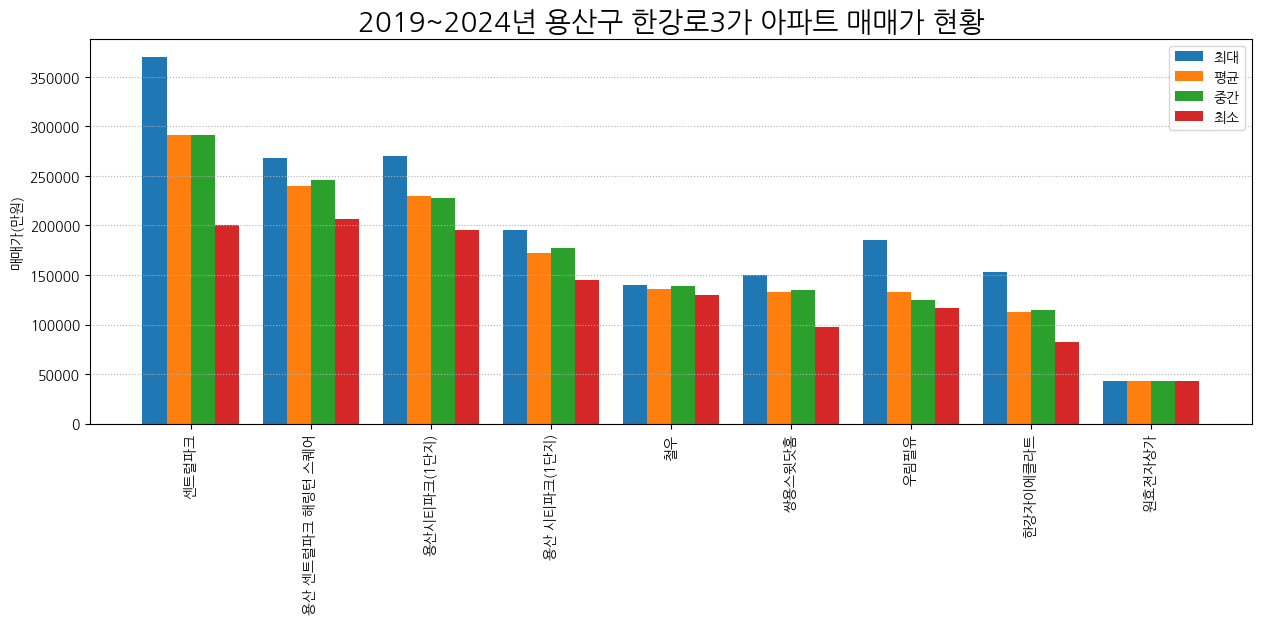

In [42]:
plt.rcParams['figure.figsize']=(15,5)
plt.bar(xx_index-0.3, df_apt_name_hanga_price['최대'], width=0.2, label='최대')
plt.bar(xx_index-0.1, df_apt_name_hanga_price['평균'], width=0.2, label='평균')
plt.bar(xx_index+0.1, df_apt_name_hanga_price['중간'], width=0.2, label='중간')
plt.bar(xx_index+0.3, df_apt_name_hanga_price['최소'], width=0.2, label='최소')
plt.legend()
plt.xticks(xx_index, labels=df_apt_name_hanga_price.index, rotation=90)
plt.grid(axis='y', ls=':')
plt.title('2019~2024년 용산구 한강로3가 아파트 매매가 현황', size=20)
plt.ylabel('매매가(만원)')
plt.show();

중간값이 큰 순서로

In [64]:
# prompt: 위에서 뽑은 '한강로3가'의 '건물명'중 '물건금액(만원)'의 중간값이 큰 순서로 뽑아줘

df_apt_name_hanga_price.sort_values(by='중간',ascending=False)

,최대,중간,평균,최소
건물명,,,,
센트럴파크,370000,291500.0,291367.8,200100
용산 센트럴파크 해링턴 스퀘어,268000,245945.0,240189.3,206623
용산시티파크(1단지),270000,227500.0,230000.0,195000
용산 시티파크(1단지),195000,177000.0,172333.3,145000
철우,140000,139000.0,136200.0,130000
쌍용스윗닷홈,149500,135000.0,132722.2,98000
우림필유,185000,125000.0,133220.0,117000
한강자이에클라트,153000,115000.0,112307.7,82000
원효전자상가,43500,43500.0,43500.0,43500


한강로3가의 아파트 이름을 보니 대부분 신축 아파트일 확률이 높은 것 같다.

일단 가격상승률이 높은 두번째 동네인 이촌동도 분석해보자.

In [83]:
df_apt_name_echon = df_apt[df_apt['법정동명'] == '이촌동']
df_apt_name_echon_price = df_apt_name_echon.groupby('건물명')['물건금액(만원)'].agg(['max', 'median', 'mean', 'min'])
df_apt_name_echon_price = df_apt_name_echon_price.sort_values(by='median', ascending=False)
df_apt_name_echon_price.columns = ['최대', '중간', '평균', '최소']
df_apt_name_echon_price

,최대,중간,평균,최소
건물명,,,,
한강맨숀,400000,261750.0,287135.555556,200000
왕궁,264500,187500.0,189996.551724,138000
이촌동삼성리버스위트,185000,185000.0,185000.000000,185000
동부센트레빌,250000,183250.0,185785.714286,120000
우성,214000,174500.0,169812.500000,110000
삼익,233500,169350.0,178082.352941,158000
강촌,266000,163000.0,168215.873016,100000
LG한강자이,214000,162000.0,171357.142857,148500
한가람,283000,159000.0,162835.733333,90000


In [84]:
#중간값 기준으로 정렬
df_apt_name_echon_price = df_apt_name_echon_price.sort_values('중간',ascending=False)
df_apt_name_echon_price

,최대,중간,평균,최소
건물명,,,,
한강맨숀,400000,261750.0,287135.555556,200000
왕궁,264500,187500.0,189996.551724,138000
이촌동삼성리버스위트,185000,185000.0,185000.000000,185000
동부센트레빌,250000,183250.0,185785.714286,120000
우성,214000,174500.0,169812.500000,110000
삼익,233500,169350.0,178082.352941,158000
강촌,266000,163000.0,168215.873016,100000
LG한강자이,214000,162000.0,171357.142857,148500
한가람,283000,159000.0,162835.733333,90000


In [85]:
xxx_index = np.arange(1,len(df_apt_name_echon_price)+1)
xxx_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

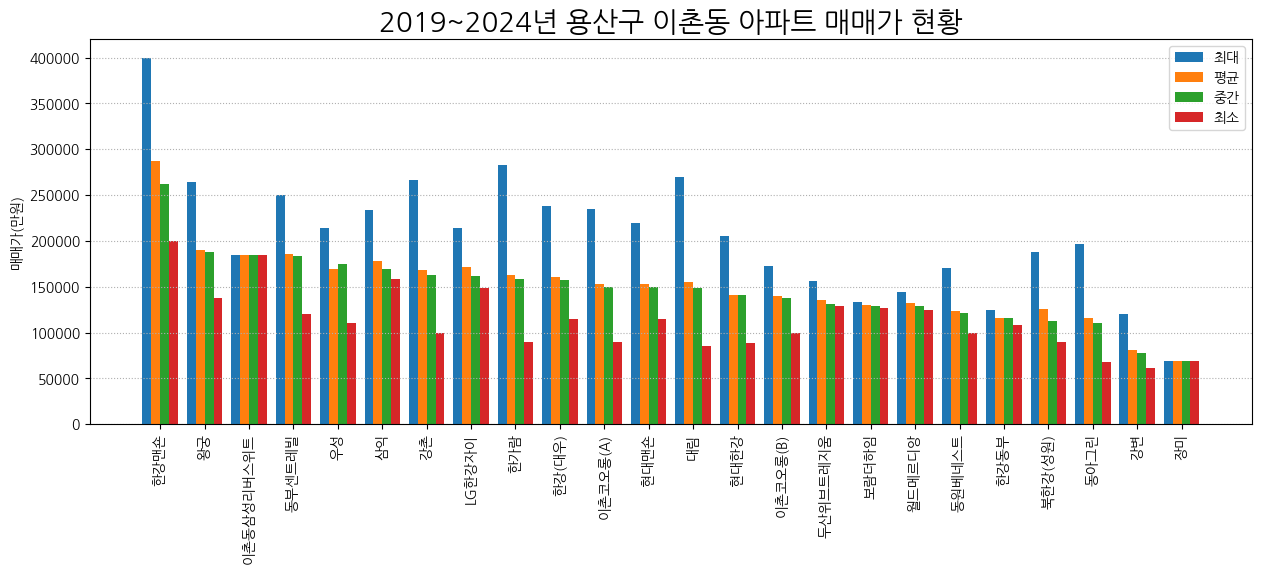

In [86]:
plt.rcParams['figure.figsize']=(15,5)
plt.bar(xxx_index-0.3, df_apt_name_echon_price['최대'], width=0.2, label='최대')
plt.bar(xxx_index-0.1, df_apt_name_echon_price['평균'], width=0.2, label='평균')
plt.bar(xxx_index+0.1, df_apt_name_echon_price['중간'], width=0.2, label='중간')
plt.bar(xxx_index+0.3, df_apt_name_echon_price['최소'], width=0.2, label='최소')
plt.legend()
plt.xticks(xxx_index, labels=df_apt_name_echon_price.index, rotation=90)
plt.grid(axis='y', ls=':')
plt.title('2019~2024년 용산구 이촌동 아파트 매매가 현황', size=20)
plt.ylabel('매매가(만원)')
plt.show();

In [87]:
#이촌동 건물명 중 중간값이 큰 순서로
df_apt_name_echon_price.sort_values(by='중간',ascending=False)

,최대,중간,평균,최소
건물명,,,,
한강맨숀,400000,261750.0,287135.555556,200000
왕궁,264500,187500.0,189996.551724,138000
이촌동삼성리버스위트,185000,185000.0,185000.000000,185000
동부센트레빌,250000,183250.0,185785.714286,120000
우성,214000,174500.0,169812.500000,110000
삼익,233500,169350.0,178082.352941,158000
강촌,266000,163000.0,168215.873016,100000
LG한강자이,214000,162000.0,171357.142857,148500
한가람,283000,159000.0,162835.733333,90000


이촌동의 아파트 이름을 보니 한강로3가의 아파트 이름들 보다 조금 더 구축아파트인 느낌이 있다

건축년도가 최근일수록 가격이 높은걸까? 용 산구 아파트 전체를 비교해서 봐야겠다.

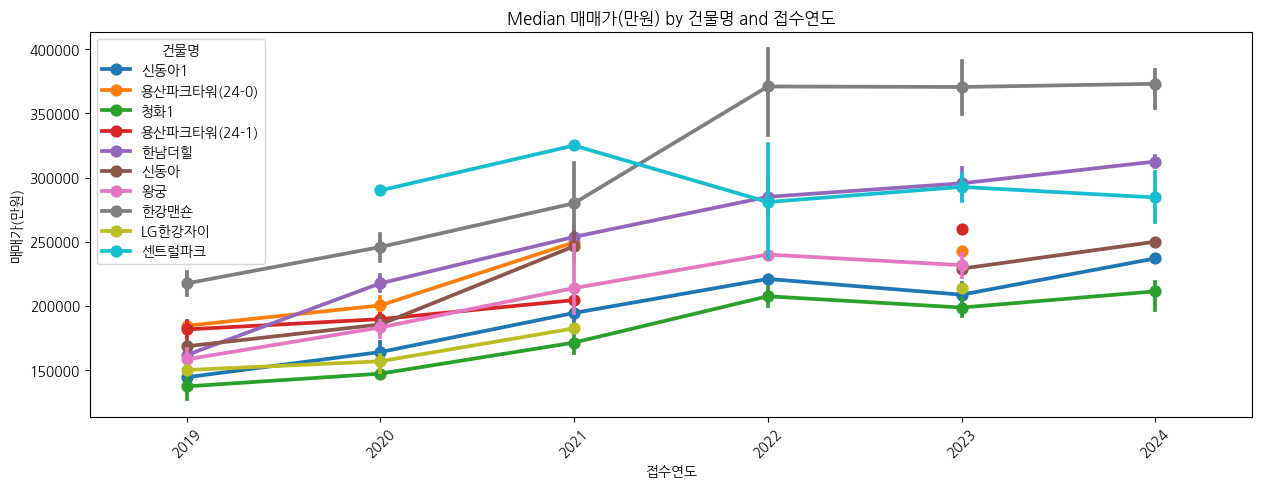

In [88]:
# prompt: 용산구 아파트의 매매가 중간값 top 10개의  '건물명','접수연도'별로 '매매가(만원)'의 중간값의 변화를 pointplot으로 시각화할 수 있는 코드를 짜줘

import matplotlib.pyplot as plt
# Create a list of the top 10 건물명
top_10_건물명 = df_apt_2023_hanga_median_unique.index[:10].to_list()

# Filter the dataframe to only include the top 10 건물명
df_apt_top_10_건물명 = df_apt[df_apt['건물명'].isin(top_10_건물명)]

# Create a pointplot of the median 매매가(만원) for each 건물명 and 접수연도
sns.pointplot(data=df_apt_top_10_건물명, x="접수연도", y="물건금액(만원)", hue="건물명")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels to the plot
plt.title("Median 매매가(만원) by 건물명 and 접수연도")
plt.xlabel("접수연도")
plt.ylabel("매매가(만원)")

# Show the plot
plt.show()


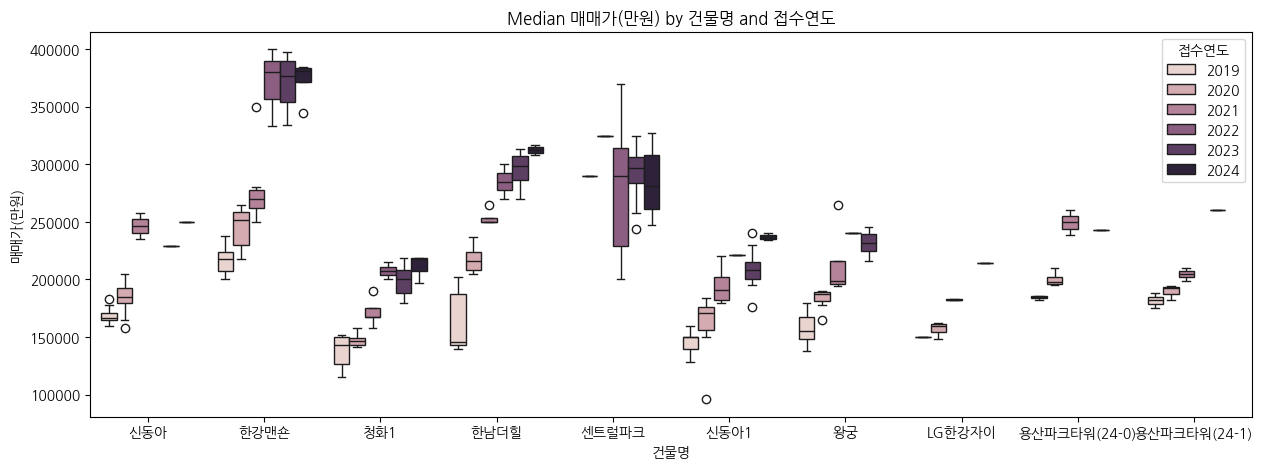

In [53]:
# prompt:  위에서 뽑은 10개의  '건물명'별로 '접수연도'별로 '매매가(만원)'의 중간값의 변화를 boxplot으로 시각화할 수 있는 코드를 짜줘

import matplotlib.pyplot as plt
df_apt_top_10_건물명 = df_apt[df_apt['건물명'].isin(top_10_건물명)]

# Create a boxplot of the median 매매가(만원) for each 건물명 and 접수연도
sns.boxplot(data=df_apt_top_10_건물명, x="건물명", y="물건금액(만원)", hue="접수연도")

# Add a title and labels to the plot
plt.title("Median 매매가(만원) by 건물명 and 접수연도")
plt.xlabel("건물명")
plt.ylabel("매매가(만원)")

# Show the plot
plt.show()


용산구 아파트 전체로 봤을 때는 구축 아파트로 추정되는 이름도 꽤 보인다.

추측하기로는

신동아 / 한강맨숀 / 청화1/ 신동아1/ 왕궁 은 구축 아파트 느낌


한남더힐 / 센트럴파크 / LG한강자이 / 용산파크타워 는 신축 아파트 느낌

In [46]:
# prompt: '건축년도' 값 중 0 을 제거하는 코드를 짜줘

df_apt = df_apt[df_apt['건축년도'] != 0]

전체 데이터로 일단 분석

Correlation coefficient between '물건금액(만원)' and '건축년도': 0.02853460046462104


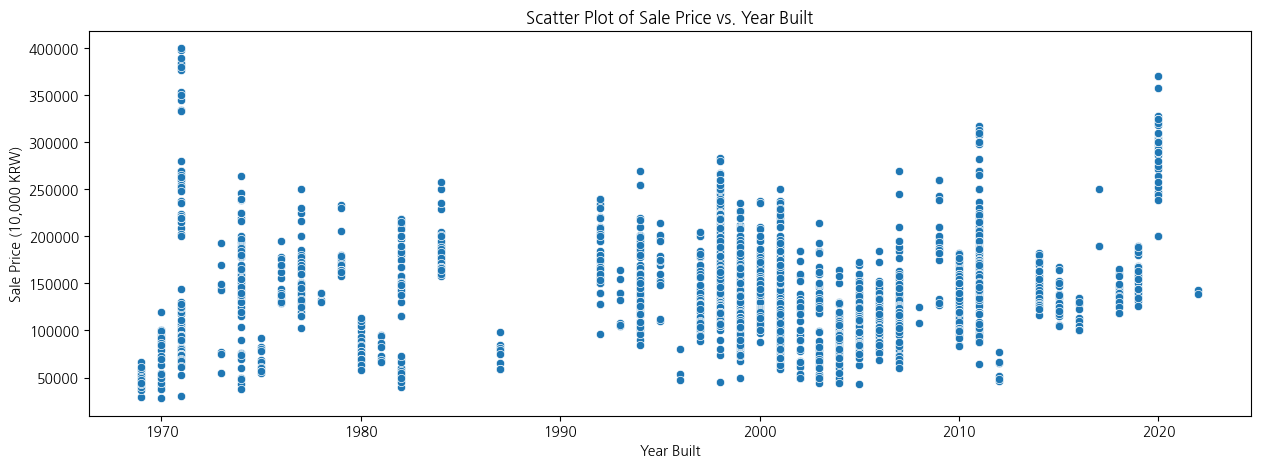

In [47]:
# prompt: '물건금액(만원)'과 '건축년도'의 상관관계를 나타낼 수 있는 코드를 짜줘. 시각화도 시켜줘.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient between '물건금액(만원)' and '건축년도'
correlation = df_apt['물건금액(만원)'].corr(df_apt['건축년도'])

# Print the correlation coefficient
print(f"Correlation coefficient between '물건금액(만원)' and '건축년도': {correlation}")

# Create a scatter plot to visualize the correlation
sns.scatterplot(data=df_apt, x='건축년도', y='물건금액(만원)')

# Add a title and labels to the plot
plt.title('Scatter Plot of Sale Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price (10,000 KRW)')

# Show the plot
plt.show()


최근에 지어진 것일수록 혹은 옛날에 지어진 아파트일수록 가격이 높은 것으로 보인다.
그러면 위에서 분석했던 아파트들의 건축년도를 찾아보자.


In [79]:
# prompt: '건물명'이 '신동아', '한강맨숀', '청화1', '신동아1', '왕궁', '한남더힐','센트럴파크', 'LG한강자이','용산파크타워' 인 데이터들을 뽑아줘
# 이 중에서 '물건금액(만원)'이 가장 높은 데이터들로 '건물명' 중복을 제거한 데이터를 보여줘
# 그리고 '건축년도'로 오름차순 정렬해줘

df_apt_target = df_apt[df_apt['건물명'].isin(['신동아', '한강맨숀', '청화1', '신동아1', '왕궁', '한남더힐','센트럴파크', 'LG한강자이','용산파크타워'])]
df_apt_target_max = df_apt_target.sort_values(by='물건금액(만원)', ascending=False).drop_duplicates(subset='건물명')
df_apt_target_max = df_apt_target_max.sort_values(by='건축년도', ascending=True)
df_apt_target_max


,자치구명,법정동명,건물명,건물면적(㎡),물건금액(만원),건물용도,접수연도,건축년도
2764,용산구,이촌동,한강맨숀,101,400000,아파트,2022,1971
4570,용산구,이촌동,왕궁,102,264500,아파트,2021,1974
298,용산구,이태원동,청화1,106,219000,아파트,2024,1982
5470,용산구,서빙고동,신동아,95,258000,아파트,2021,1984
1216,용산구,보광동,신동아1,84,240000,아파트,2023,1992
1290,용산구,이촌동,LG한강자이,66,214000,아파트,2023,2003
303,용산구,한남동,한남더힐,59,317000,아파트,2024,2011
2552,용산구,한강로3가,센트럴파크,114,370000,아파트,2022,2020


Correlation coefficient between '물건금액(만원)' and '건축년도': 0.11992774985138902


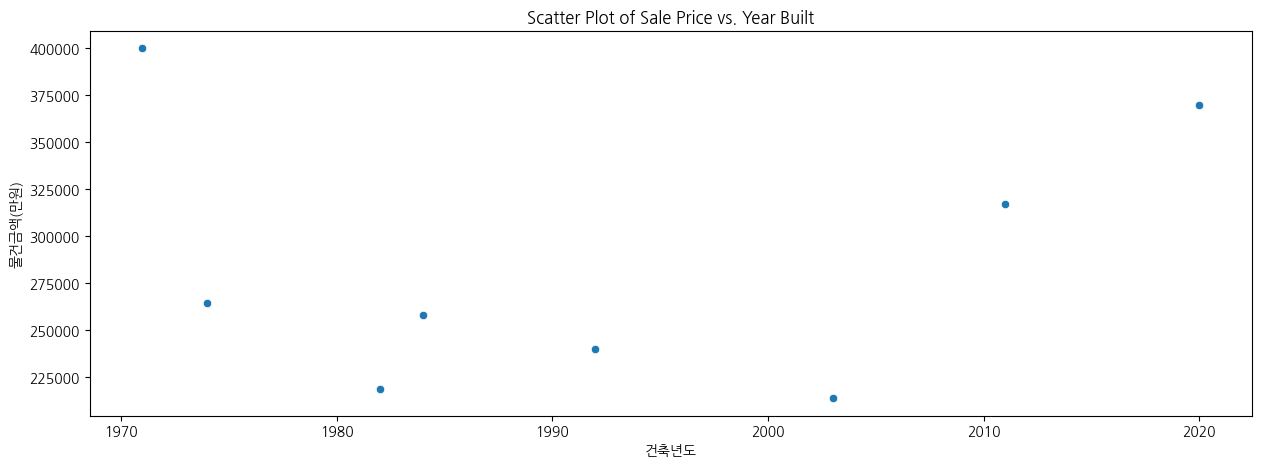

In [81]:
# prompt: df_apt_target_max값과 '건축년도' 의 상관관계를 보여줘

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate the correlation coefficient between '물건금액(만원)' and '건축년도'
correlation = df_apt_target_max['물건금액(만원)'].corr(df_apt_target_max['건축년도'])

# Print the correlation coefficient
print(f"Correlation coefficient between '물건금액(만원)' and '건축년도': {correlation}")

# Create a scatter plot to visualize the correlation
sns.scatterplot(data=df_apt_target_max, x='건축년도', y='물건금액(만원)')

# Add a title and labels to the plot
plt.title('Scatter Plot of Sale Price vs. Year Built')
plt.xlabel('건축년도')
plt.ylabel('물건금액(만원)')

# Show the plot
plt.show()


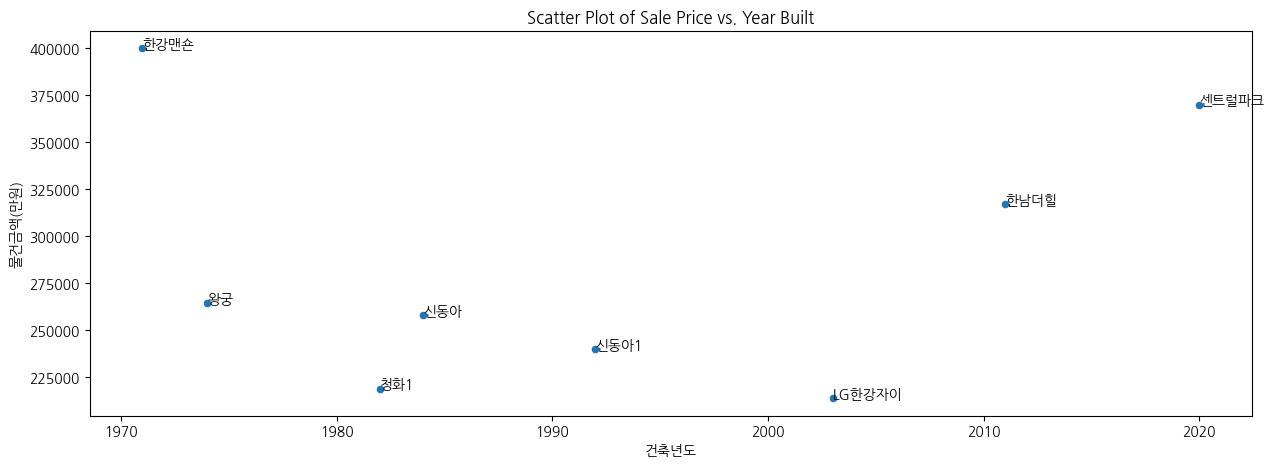

In [82]:
# prompt: 위에서 그려준 scatter 에다가 해당하는 '건물명'을 입력해줘

import matplotlib.pyplot as plt
# Create a scatter plot to visualize the correlation
sns.scatterplot(data=df_apt_target_max, x='건축년도', y='물건금액(만원)')

# Add a title and labels to the plot
plt.title('Scatter Plot of Sale Price vs. Year Built')
plt.xlabel('건축년도')
plt.ylabel('물건금액(만원)')

# Add annotations for each point
for i, row in df_apt_target_max.iterrows():
    plt.annotate(row['건물명'], (row['건축년도'], row['물건금액(만원)']))

# Show the plot
plt.show()


# 결론
용산구의 아파트 가격은 2019년 이후로 계속해서 상승 중이다.

그 중 가격 폭이 높은 동네들은 신축아파트가 있거나 구축아파트가 거래가 되었다.

분석결과 건축년도에 상관관계가 있는 것으로 보여지며

특히 구축일수록 혹은 신축일수록 실거래가가 높은 것으로 보여진다.
